In [1]:
versioninfo()

Julia Version 1.9.0
Commit 8e630552924 (2023-05-07 11:25 UTC)
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 16 × AMD Ryzen 7 PRO 4750U with Radeon Graphics
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-14.0.6 (ORCJIT, znver2)
  Threads: 2 on 16 virtual cores
Environment:
  JULIA_PKG_SERVER = https://mirrors.tuna.tsinghua.edu.cn/julia


In [ ]:
using StatsPlots, Turing;

In [3]:
using Turing

@model function globe_toss(n, k)
    θ ~ Beta(1, 1)
    k ~ Binomial(n, θ)
    return k, θ
end;

In [4]:
?NUTS

search: NUTS ANUTS DynamicNUTS ncodeunits InteractiveUtils



```
NUTS(n_adapts::Int, δ::Float64; max_depth::Int=10, Δ_max::Float64=1000.0, init_ϵ::Float64=0.0)
```

No-U-Turn Sampler (NUTS) sampler.

Usage:

```julia
NUTS()            # Use default NUTS configuration.
NUTS(1000, 0.65)  # Use 1000 adaption steps, and target accept ratio 0.65.
```

Arguments:

  * `n_adapts::Int` : The number of samples to use with adaptation.
  * `δ::Float64` : Target acceptance rate for dual averaging.
  * `max_depth::Int` : Maximum doubling tree depth.
  * `Δ_max::Float64` : Maximum divergence during doubling tree.
  * `init_ϵ::Float64` : Initial step size; 0 means automatically searching using a heuristic procedure.


In [5]:
using Random

Random.seed!(1)
n=9;
k=6;
@time chns = sample(globe_toss(n, k), NUTS(), 1000)

┌ Info: Found initial step size
└   ϵ = 1.6


 15.788448 seconds (30.28 M allocations: 1.934 GiB, 6.21% gc time, 99.66% compilation time: <1% of which was recompilation)


Chains MCMC chain (1000×13×1 Array{Float64, 3}):

Iterations        = 501:1:1500
Number of chains  = 1
Samples per chain = 1000
Wall duration     = 7.16 seconds
Compute duration  = 7.16 seconds
parameters        = θ
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std      mcse   ess_bulk   ess_tail      rhat   e ⋯
      Symbol   Float64   Float64   Float64    Float64    Float64   Float64     ⋯

           θ    0.6311    0.1374    0.0059   554.2081   673.3849    1.0008     ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

           θ    0.3480    0.5420    0.6414    0.7383    0.8604


┌ Info: Found initial step size
└   ϵ = 1.6


  0.048594 seconds (354.12 k allocations: 25.419 MiB)


Chains MCMC chain (1000×13×1 Array{Float64, 3}):

Iterations        = 501:1:1500
Number of chains  = 1
Samples per chain = 1000
Wall duration     = 0.04 seconds
Compute duration  = 0.04 seconds
parameters        = θ
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std      mcse   ess_bulk   ess_tail      rhat   e ⋯
      Symbol   Float64   Float64   Float64    Float64    Float64   Float64     ⋯

           θ    0.6311    0.1374    0.0059   554.2081   673.3849    1.0008     ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

           θ    0.3480    0.5420    0.6414    0.7383    0.8604


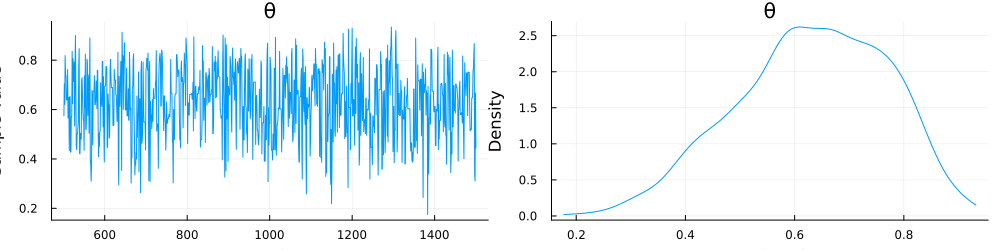

In [17]:
Random.seed!(1)
n=9;
k=6;
@time chns = sample(globe_toss(n, k), NUTS(), 1000)
display(chns)
StatsPlots.plot(chns)

┌ Info: Found initial step size
└   ϵ = 1.6


  0.060520 seconds (370.11 k allocations: 26.493 MiB, 24.53% gc time)


Chains MCMC chain (1000×13×1 Array{Float64, 3}):

Iterations        = 501:1:1500
Number of chains  = 1
Samples per chain = 1000
Wall duration     = 0.05 seconds
Compute duration  = 0.05 seconds
parameters        = θ
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std      mcse   ess_bulk   ess_tail      rhat   e ⋯
      Symbol   Float64   Float64   Float64    Float64    Float64   Float64     ⋯

           θ    0.6413    0.1353    0.0067   408.6984   559.6585    1.0025     ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

           θ    0.3596    0.5501    0.6521    0.7399    0.8905


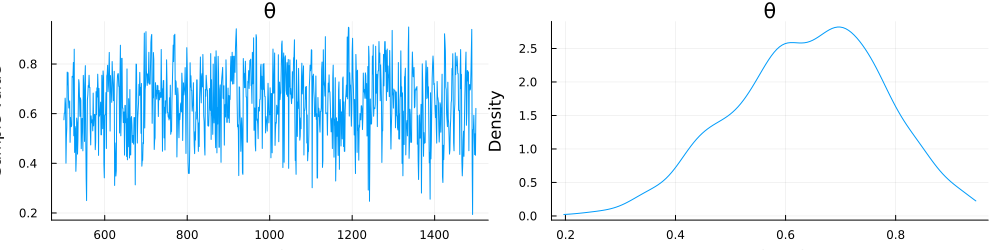

In [15]:
Random.seed!(10)
n=9;
k=6;
@time chns = sample(globe_toss(n, k), NUTS(), 1000)
display(chns)
StatsPlots.plot(chns)